In [3]:
#File location and type
file_location =  '/home/koushik/Documents/loan.csv'
file_type = 'csv'

#CSV Options
infer_schema = 'true'
first_row_is_header = 'true'
delimiter = ','

df = spark.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", delimiter) \
    .load(file_location)

display(df)

DataFrame[id: int, member_id: int, loan_amnt: double, funded_amnt: double, funded_amnt_inv: double, term: string, int_rate: double, installment: double, grade: string, sub_grade: string, emp_title: string, emp_length: string, home_ownership: string, annual_inc: string, verification_status: string, issue_d: string, loan_status: string, pymnt_plan: string, url: string, desc: string, purpose: string, title: string, zip_code: string, addr_state: string, dti: string, delinq_2yrs: string, earliest_cr_line: string, inq_last_6mths: string, mths_since_last_delinq: string, mths_since_last_record: string, open_acc: string, pub_rec: string, revol_bal: string, revol_util: string, total_acc: string, initial_list_status: string, out_prncp: string, out_prncp_inv: string, total_pymnt: string, total_pymnt_inv: string, total_rec_prncp: string, total_rec_int: string, total_rec_late_fee: string, recoveries: string, collection_recovery_fee: string, last_pymnt_d: string, last_pymnt_amnt: string, next_pymnt_d

In [10]:
df.count()

887379

In [11]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- member_id: integer (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: strin

In [12]:
temp_table_name = 'loanstats'

df.createOrReplaceTempView(temp_table_name)

In [14]:
df.describe().show()

+-------+--------------------+--------------------+-----------------+------------------+-----------------+----------+-----------------+------------------+------+---------+--------------------+----------+--------------+------------------+-------------------+---------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+----------------------+----------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+------------------+-----------------+------------------+------------------+--------------------------+---------------------------+---------------

In [206]:
df_sel = df.select("term","home_ownership","grade","purpose","int_rate", "addr_state", "loan_status", 
                   "application_type","loan_amnt","emp_length", "annual_inc", "dti","delinq_2yrs","revol_util", 
                   "total_acc", "dti_joint")

In [207]:
df_sel.describe().show()

+-------+----------+--------------+------+--------------------+-----------------+--------------------+-----------+-----------------+-----------------+----------+------------------+------------------+-------------------+--------------------+--------------------+------------------+
|summary|      term|home_ownership| grade|             purpose|         int_rate|          addr_state|loan_status| application_type|        loan_amnt|emp_length|        annual_inc|               dti|        delinq_2yrs|          revol_util|           total_acc|         dti_joint|
+-------+----------+--------------+------+--------------------+-----------------+--------------------+-----------+-----------------+-----------------+----------+------------------+------------------+-------------------+--------------------+--------------------+------------------+
|  count|    887379|        887379|887379|              887378|           887379|              887378|     887379|           887318|           887379|    887

In [208]:
df_sel.cache()

DataFrame[term: string, home_ownership: string, grade: string, purpose: string, int_rate: double, addr_state: string, loan_status: string, application_type: string, loan_amnt: double, emp_length: string, annual_inc: string, dti: string, delinq_2yrs: string, revol_util: string, total_acc: string, dti_joint: string]

In [44]:
df_sel.describe("loan_amnt","emp_length", "dti","delinq_2yrs","revol_util", "total_acc").show()

+-------+-----------------+----------+------------------+-------------------+--------------------+--------------------+
|summary|        loan_amnt|emp_length|               dti|        delinq_2yrs|          revol_util|           total_acc|
+-------+-----------------+----------+------------------+-------------------+--------------------+--------------------+
|  count|           887379|    887379|            887378|             887349|              886845|              887329|
|   mean|14755.26460508982|      null|18.158655847435277|0.31530134633073026|  56.393959880558796|   26.01553412578286|
| stddev| 8435.45560127837|      null|17.192408374925296| 0.8702762972297754|  294.04499175537825|  165.31718102954812|
|    min|            500.0| reactors"|       Karen     "|           BEST BUY| #450216.<br/> 55...| and the work we ...|
|    max|          35000.0|       n/a|           wedding|     small_business|              moving|      small_business|
+-------+-----------------+----------+--

In [209]:
sql_df = spark.sql("SELECT distinct emp_length from loanstats limit 50")

sql_df.show()

+----------+
|emp_length|
+----------+
|   9 years|
|   5 years|
| reactors"|
|    1 year|
|       n/a|
|   2 years|
|   7 years|
|   8 years|
|   4 years|
|   6 years|
|   3 years|
| 10+ years|
|  < 1 year|
+----------+



In [210]:
from pyspark.sql.functions import regexp_replace, regexp_extract
from pyspark.sql.functions import col

In [47]:
#Method 1 to remove characters from emp_length

regex_string = "reactors\"|years|year|\\+|\\<"

df_sel.select(regexp_replace(col('emp_length'), regex_string, "").alias("emplength_cleaned")
              ,col("emp_length")).show(10)

+-----------------+----------+
|emplength_cleaned|emp_length|
+-----------------+----------+
|              10 | 10+ years|
|               1 |  < 1 year|
|              10 | 10+ years|
|              10 | 10+ years|
|               1 |    1 year|
|               3 |   3 years|
|               8 |   8 years|
|               9 |   9 years|
|               4 |   4 years|
|               1 |  < 1 year|
+-----------------+----------+
only showing top 10 rows



In [48]:
#Method 2 to remove characters from emp_length

regex_string = "\\d+"                    #To extract all the digits out

df_sel.select(regexp_extract(col("emp_length"), regex_string, 0).alias("emplength_cleaned")
              ,col("emp_length")).show(10)

+-----------------+----------+
|emplength_cleaned|emp_length|
+-----------------+----------+
|               10| 10+ years|
|                1|  < 1 year|
|               10| 10+ years|
|               10| 10+ years|
|                1|    1 year|
|                3|   3 years|
|                8|   8 years|
|                9|   9 years|
|                4|   4 years|
|                1|  < 1 year|
+-----------------+----------+
only showing top 10 rows



In [62]:
df_sel.show(2)

+----------+--------------+-----+-----------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+
|      term|home_ownership|grade|    purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|  dti|delinq_2yrs|revol_util|total_acc|dti_joint|
+----------+--------------+-----+-----------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+
| 36 months|          RENT|    B|credit_card|   10.65|        AZ| Fully Paid|      INDIVIDUAL|   5000.0| 10+ years|   24000.0|27.65|        0.0|      83.7|      9.0|     null|
| 60 months|          RENT|    C|        car|   15.27|        GA|Charged Off|      INDIVIDUAL|   2500.0|  < 1 year|   30000.0|  1.0|        0.0|       9.4|      4.0|     null|
+----------+--------------+-----+-----------+--------+----------+-----------+----------------+---------+----------+-----

In [237]:
#Creating new column emplength_cleaned in df_sel

df_sel = df_sel.withColumn("term_cleaned", regexp_replace(col("term"), "months", "")).withColumn("emplen_cleaned", regexp_extract(col("emp_length"), "\\d+", 0))

df_sel.select("term_cleaned","term","emplen_cleaned", "emp_length").show(15)

+------------+----------+--------------+----------+
|term_cleaned|      term|emplen_cleaned|emp_length|
+------------+----------+--------------+----------+
|         36 | 36 months|            10| 10+ years|
|         60 | 60 months|             1|  < 1 year|
|         36 | 36 months|            10| 10+ years|
|         36 | 36 months|            10| 10+ years|
|         60 | 60 months|             1|    1 year|
|         36 | 36 months|             3|   3 years|
|         60 | 60 months|             8|   8 years|
|         36 | 36 months|             9|   9 years|
|         60 | 60 months|             4|   4 years|
|         60 | 60 months|             1|  < 1 year|
|         60 | 60 months|             5|   5 years|
|         36 | 36 months|            10| 10+ years|
|         36 | 36 months|             1|  < 1 year|
|         36 | 36 months|             3|   3 years|
|         36 | 36 months|             3|   3 years|
+------------+----------+--------------+----------+
only showing

In [212]:
#The new columns are still string even after cleaning

df_sel.printSchema()

root
 |-- term: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- application_type: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- dti_joint: string (nullable = true)
 |-- term_cleaned: string (nullable = true)
 |-- emplen_cleaned: string (nullable = true)



In [213]:
table_name = 'loanstats_sel'

df_sel.createOrReplaceTempView(table_name)

In [ ]:
df_sel.stat.cov('annual_inc', 'loan_amnt')       #Covariance
df_sel.stat.corr('annual_inc', 'loan_amnt')      #Correlation

In [68]:
df_sel.stat.crosstab('loan_status','grade').show()

+--------------------+------+------+------+-----+-----+-----+----+
|   loan_status_grade|     A|     B|     C|    D|    E|    F|   G|
+--------------------+------+------+------+-----+-----+-----+----+
|     In Grace Period|   365|  1240|  1887| 1405|  908|  354|  94|
|          Fully Paid| 39679| 66546| 52678|30020|12928| 4726|1146|
|Does not meet the...|     8|    85|   148|  197|  158|   93|  72|
|             Default|    47|   198|   360|  312|  201|   79|  22|
|            Oct-2015|     0|     1|     0|    0|    0|    0|   0|
|  Late (31-120 days)|   492|  2004|  3339| 2890| 1852|  768| 246|
|   Late (16-30 days)|   134|   410|   678|  569|  368|  155|  43|
|             Current|103322|171734|171175|91984|47061|13589|2913|
|Does not meet the...|    90|   269|   481|  494|  378|  154| 122|
|              Issued|  1448|  2529|  2472| 1185|  593|  194|  39|
|         Charged Off|  2617|  9519| 12642|10486| 6258| 2934| 792|
+--------------------+------+------+------+-----+-----+-----+-

In [70]:
#Collecting frequency items for purpose and grade for atleast 30% freq

freq=df_sel.stat.freqItems(['purpose','grade'], 0.3)
freq.collect()               #Action

[Row(purpose_freqItems=['debt_consolidation', 'credit_card'], grade_freqItems=['A', 'C', 'B'])]

In [73]:
df_sel.groupby('purpose').count().show()

+--------------------+-----+
|             purpose|count|
+--------------------+-----+
| I have eliminate...|    1|
| I am not comfort...|    1|
| my cell is on a ...|    1|
| MD""... approx. ...|    1|
| and have never h...|    1|
|<br/><br/>Lending...|    1|
| which was a swin...|    1|
| usually doubling...|    1|
| as long as we pa...|    1|
| and have a solid...|    1|
| but want to make...|    1|
| the grass is in ...|    1|
|        increasingly|    1|
| this was a good ...|    1|
| which is $250 a ...|    1|
| I have the means...|    1|
| I will receive t...|    1|
| I will be able t...|    1|
| but any help wou...|    1|
| at which point I...|    1|
+--------------------+-----+
only showing top 20 rows



In [77]:
df_sel.groupby('purpose').count().orderBy(col('count').desc()).show()

+--------------------+------+
|             purpose| count|
+--------------------+------+
|  debt_consolidation|524129|
|         credit_card|206137|
|    home_improvement| 51812|
|               other| 42867|
|      major_purchase| 17261|
|      small_business| 10347|
|                 car|  8859|
|             medical|  8533|
|              moving|  5413|
|            vacation|  4736|
|               house|  3702|
|             wedding|  2343|
|    renewable_energy|   575|
|         educational|   411|
| and have never h...|     1|
| as long as we pa...|     1|
| usually doubling...|     1|
| and have a solid...|     1|
| which is $250 a ...|     1|
| I have the means...|     1|
+--------------------+------+
only showing top 20 rows



In [78]:
from pyspark.sql.functions import count, max, min, avg, mean, stddev_pop

In [214]:
#Checking for no. of "not-a-number" and "Null" values in each column

from pyspark.sql.functions import isnan, when, count, col

df_sel.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|   0|             0|    0|      1|       0|         1|          0|              61|        0|         0|         4|  1|         30|       534|       50|   886704|           0|             0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+



In [215]:
#Removing null values in selected columns

df_sel=df_sel.na.drop("any", subset=["purpose", 'addr_state', 'annual_inc',"dti","application_type", "total_acc"])

In [216]:
df_sel.count()                 #99 rows got removed

887280

In [217]:
df_sel.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|       493|        0|   886673|           0|             0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+



In [218]:
df_sel = df_sel.withColumn("delinq_2yrs", regexp_extract(col("delinq_2yrs"), "\\d+", 0)).withColumn("total_acc", regexp_extract(col("total_acc"), "\\d+", 0)).withColumn("dti", regexp_extract(col("dti"), "\\d+", 0)).withColumn("revol_util", regexp_extract(col("revol_util"), "\\d+", 0))

In [219]:
df_sel.describe("delinq_2yrs","total_acc", "dti", "revol_util").show()

+-------+------------------+------------------+------------------+-----------------+
|summary|       delinq_2yrs|         total_acc|               dti|       revol_util|
+-------+------------------+------------------+------------------+-----------------+
|  count|            887280|            887280|            887280|           886787|
|   mean|0.3662911141017058|25.300491511536038|17.679867075330367|57.13639951734948|
| stddev|10.037544702771623|14.140009249263008|20.070829613592487| 827.244518427995|
|    min|                  |                  |                  |                 |
|    max|               981|                99|              9999|             9989|
+-------+------------------+------------------+------------------+-----------------+



In [145]:
df_sel.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|       493|        0|   886673|           0|             0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+



In [220]:
#Function to return average value of a column to be replaced in place of null

def fill_avg(df,colname):
    return df.select(colname).agg(avg(colname))

In [221]:
rev_avg = fill_avg(df_sel, "revol_util")

In [222]:
from pyspark.sql.functions import lit

rev_avg = fill_avg(df_sel, "revol_util").first()[0]
df_sel = df_sel.withColumn("rev_avg", lit(rev_avg))

In [223]:
from pyspark.sql.functions import coalesce

df_sel = df_sel.withColumn("revol_util_cleaned",coalesce(col("revol_util"),col("rev_avg")))

In [157]:
df_sel.describe('revol_util', 'revol_util_cleaned').show()

+-------+-----------------+------------------+
|summary|       revol_util|revol_util_cleaned|
+-------+-----------------+------------------+
|  count|           886787|            887280|
|   mean|57.13639951734948| 57.13639951734943|
| stddev| 827.244518427995| 827.0146606095446|
|    min|                 |                  |
|    max|             9989|              9989|
+-------+-----------------+------------------+



In [224]:
df_sel = df_sel.withColumn("revol_util_cleaned",df_sel["revol_util_cleaned"].cast("double"))

In [162]:
df_sel.describe('revol_util', 'revol_util_cleaned').show()

+-------+-----------------+------------------+
|summary|       revol_util|revol_util_cleaned|
+-------+-----------------+------------------+
|  count|           886787|            887263|
|   mean|57.13639951734948| 57.13632372813923|
| stddev| 827.244518427995| 827.0146606158012|
|    min|                 |               0.0|
|    max|             9989|          572366.0|
+-------+-----------------+------------------+



In [225]:
df_sel.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-------+------------------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|rev_avg|revol_util_cleaned|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-------+------------------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|       493|        0|   886673|           0|             0|      0|                17|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+----

In [226]:
df_sel=df_sel.na.drop("all", subset=["revol_util_cleaned"])

In [227]:
df_sel.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-------+------------------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|rev_avg|revol_util_cleaned|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-------+------------------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|       493|        0|   886673|           0|             0|      0|                 0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+----

In [228]:
df_sel.groupby("loan_status").count().show()

+--------------------+------+
|         loan_status| count|
+--------------------+------+
|          Fully Paid|207663|
|             Default|  1219|
|     In Grace Period|  6253|
|Does not meet the...|  1957|
|         Charged Off| 45234|
|  Late (31-120 days)| 11591|
|              Issued|  8460|
|             Current|601778|
|Does not meet the...|   751|
|   Late (16-30 days)|  2357|
+--------------------+------+



In [170]:
#where condition in loan_status

df_sel.where(df_sel.loan_status.isin(["In Grace Period", "Charged Off", "Late (31-120 days)", "Late (16-30 days)"
                                     , "Does not meet the credit policy. Status:Charged Off"
                                     , "Does not meet the credit policy. Status:Fully Paid"])).show(5)

+----------+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-----------------+------------------+
|      term|home_ownership|grade|           purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|          rev_avg|revol_util_cleaned|
+----------+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-----------------+------------------+
| 60 months|          RENT|    C|               car|   15.27|        GA|Charged Off|      INDIVIDUAL|   2500.0|  < 1 year|   30000.0|  1|          0|         9|        4|     null|         60 |             1|57.13639951734948|               9.0|
| 60 months|    

In [229]:
# Creating a column "bad_loan" to reduce the variables

df_sel = df_sel.withColumn("bad_loan", when(df_sel.loan_status.isin(["In Grace Period", "Charged Off", "Late (31-120 days)", "Late (16-30 days)"
                                     , "Does not meet the credit policy. Status:Charged Off"
                                     , "Does not meet the credit policy. Status:Fully Paid"]), 'Yes').otherwise('No'))

In [230]:
df_sel.groupby("bad_loan").count().show()

+--------+------+
|bad_loan| count|
+--------+------+
|      No|819120|
|     Yes| 68143|
+--------+------+



In [179]:
df_sel.filter(df_sel.bad_loan=="Yes").show(5)

+----------+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-----------------+------------------+--------+
|      term|home_ownership|grade|           purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|term_cleaned|emplen_cleaned|          rev_avg|revol_util_cleaned|bad_loan|
+----------+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+------------+--------------+-----------------+------------------+--------+
| 60 months|          RENT|    C|               car|   15.27|        GA|Charged Off|      INDIVIDUAL|   2500.0|  < 1 year|   30000.0|  1|          0|         9|        4|     null|         60 |             1|57.13639951734948|         

In [231]:
df_sel.printSchema()

root
 |-- term: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- application_type: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- dti_joint: string (nullable = true)
 |-- term_cleaned: string (nullable = true)
 |-- emplen_cleaned: string (nullable = true)
 |-- rev_avg: double (nullable = false)
 |-- revol_util_cleaned: double (nullable = true)
 |-- bad_loan: string (nullable = false)



In [238]:
#Correcting the data types of the columns

df_sel= df_sel.withColumn("annual_inc", df_sel["annual_inc"].cast("double"))
df_sel= df_sel.withColumn("dti", df_sel["dti"].cast("double"))
df_sel= df_sel.withColumn("delinq_2yrs", df_sel["delinq_2yrs"].cast("int"))
df_sel= df_sel.withColumn("total_acc", df_sel["total_acc"].cast("int"))

In [239]:
#Removing the uncleaned/unnecessary columns

df_sel_final=df_sel.drop("revol_util","dti_joint")

In [240]:
df_sel_final.printSchema()

root
 |-- term: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- application_type: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- annual_inc: double (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: integer (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- term_cleaned: string (nullable = true)
 |-- emplen_cleaned: string (nullable = true)
 |-- rev_avg: double (nullable = false)
 |-- revol_util_cleaned: double (nullable = true)
 |-- bad_loan: string (nullable = false)



In [241]:
df_sel_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel_final.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+-------+------------------+--------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|total_acc|term_cleaned|emplen_cleaned|rev_avg|revol_util_cleaned|bad_loan|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+-------+------------------+--------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|150|         46|       12|           0|             0|      0|                 0|       0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+--

In [246]:
df_sel_final = df_sel_final.na.drop("any", subset=["dti","delinq_2yrs", "total_acc"])

In [247]:
df_sel_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_sel_final.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+-------+------------------+--------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|total_acc|term_cleaned|emplen_cleaned|rev_avg|revol_util_cleaned|bad_loan|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+-------+------------------+--------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|        0|           0|             0|      0|                 0|       0|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+---------+------------+--------------+--

In [248]:
df_sel_final.stat.crosstab("bad_loan","grade").show()

+--------------+------+------+------+------+-----+-----+----+
|bad_loan_grade|     A|     B|     C|     D|    E|    F|   G|
+--------------+------+------+------+------+-----+-----+----+
|            No|144453|240938|226651|123480|60774|18584|4119|
|           Yes|  3693| 13506| 19155| 16025| 9910| 4454|1365|
+--------------+------+------+------+------+-----+-----+----+



In [249]:
df_sel_final.describe('dti').show()

+-------+------------------+
|summary|               dti|
+-------+------------------+
|  count|            887107|
|   mean|17.678600213953896|
| stddev|20.052839990973407|
|    min|               0.0|
|    max|            9999.0|
+-------+------------------+



In [250]:
df_sel_final.filter(df_sel_final.dti>100).count()

15

In [251]:
df_sel_final.filter(df_sel_final.dti>100).show()

+----------+--------------+-----+--------------------+--------+--------------------+-----------+----------------+---------+----------+----------+------+-----------+---------+------------+--------------+-----------------+------------------+--------+
|      term|home_ownership|grade|             purpose|int_rate|          addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|   dti|delinq_2yrs|total_acc|term_cleaned|emplen_cleaned|          rev_avg|revol_util_cleaned|bad_loan|
+----------+--------------+-----+--------------------+--------+--------------------+-----------+----------------+---------+----------+----------+------+-----------+---------+------------+--------------+-----------------+------------------+--------+
| 36 months|          RENT|    D| progressive mult...|   16.32| profit sharing &...|Charged Off|           88.11|   5000.0|   7 years|   40000.0| 460.0|       1300|        0|         36 |             7|57.13639951734948|               6.0|     Yes|
| 36

In [253]:
#Creating a permanent table for EDA

permanent_table_name = 'lc_loan_data1'
df_sel_final.write.format("parquet").saveAsTable(permanent_table_name)

In [255]:
tab = spark.sql("select * from lc_loan_data1")
tab.show()

+----------+--------------+-----+------------------+--------+----------+------------------+----------------+---------+----------+----------+----+-----------+---------+------------+--------------+-----------------+------------------+--------+
|      term|home_ownership|grade|           purpose|int_rate|addr_state|       loan_status|application_type|loan_amnt|emp_length|annual_inc| dti|delinq_2yrs|total_acc|term_cleaned|emplen_cleaned|          rev_avg|revol_util_cleaned|bad_loan|
+----------+--------------+-----+------------------+--------+----------+------------------+----------------+---------+----------+----------+----+-----------+---------+------------+--------------+-----------------+------------------+--------+
| 60 months|           OWN|    C|debt_consolidation|   12.39|        SC|           Current|      INDIVIDUAL|  11000.0|   3 years|   60000.0|16.0|          0|       37|         60 |             3|57.13639951734948|              24.0|      No|
| 36 months|          RENT|    A

In [1]:
#Creating Dataframe from table

lc_df = spark.table("lc_loan_data1")
display(lc_df)

DataFrame[term: string, home_ownership: string, grade: string, purpose: string, int_rate: double, addr_state: string, loan_status: string, application_type: string, loan_amnt: double, emp_length: string, annual_inc: double, dti: double, delinq_2yrs: int, total_acc: int, term_cleaned: string, emplen_cleaned: string, rev_avg: double, revol_util_cleaned: double, bad_loan: string]

In [2]:
#Converting to pandas dataframe

pd_df = lc_df.toPandas()

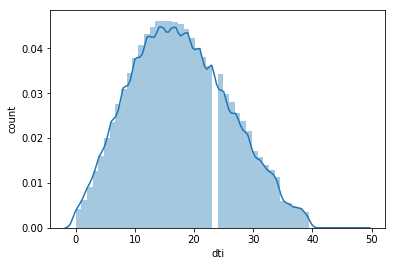

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()
sns.distplot(pd_df.loc[pd_df['dti'].notnull() & (pd_df['dti']<50), 'dti'])
plt.xlabel('dti')
plt.ylabel('count')
display()

In [5]:
#To avoid serialization and deserialization and for faster operation

spark.conf.set("spark.sql.execution.arrow.enabled", "true")

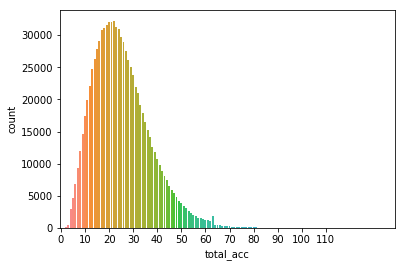

In [6]:
import numpy as np
plt.clf()
sns.countplot(pd_df.loc[pd_df['total_acc']<120, 'total_acc'], order=sorted(pd_df['total_acc'].unique()), saturation=1)
_,_ = plt.xticks(np.arange(0,120,10), np.arange(0,120,10))
plt.xlabel('total_acc')
plt.ylabel('count')
display()